### Importación de datos



In [388]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [389]:
def ventas(ventas_tiendas : dict):
  mayor = 0
  tiendaM = ""
  for tienda,precio in ventas_tiendas.items():
    print(f"la {tienda} vendio en total {precio:.0f} ")
    if(precio > mayor):
     mayor = precio
     tiendaM = tienda

  print(f"la {tiendaM} fue la que mayor ventas realizo con {mayor:.0f}")

In [390]:
ventas_tiendas = {"tienda 1": sum(tienda["Precio"]), "tienda 2": sum(tienda2["Precio"]), "tienda 3": sum(tienda3["Precio"]), "tienda 4": sum(tienda4["Precio"])}
ventas(ventas_tiendas)

la tienda 1 vendio en total 1150880400 
la tienda 2 vendio en total 1116343500 
la tienda 3 vendio en total 1098019600 
la tienda 4 vendio en total 1038375700 
la tienda 1 fue la que mayor ventas realizo con 1150880400


# 2. Ventas por categoría

In [391]:
def ventas_categoria(categorias:list, tienda:pd.DataFrame)->dict:
 #print(categorias)
  ventas_tienda_categoria = {}
  for categoria in categorias[0]:
      contador = 0
      #print(categoria)
      for categoriaT in tienda["Categoría del Producto"]:
          if(categoria == categoriaT):
             contador += 1
      ventas_tienda_categoria[categoria] = contador
  return ventas_tienda_categoria


In [392]:
categorias = [set(tienda["Categoría del Producto"])]
tienda_ventas_categoria= {"tienda 1":ventas_categoria(categorias,tienda), "tienda 2":ventas_categoria(categorias,tienda2), "tienda 3":ventas_categoria(categorias,tienda3), "tienda 4":ventas_categoria(categorias,tienda4)}
for tiendac,producto in tienda_ventas_categoria.items():
     for categoria in tienda_ventas_categoria[tiendac].keys():
        if(tienda_ventas_categoria[tiendac][categoria] == max(producto.values())):
          print(f"el producto más vendido de la {tiendac} es {categoria} con {max(producto.values())}")




el producto más vendido de la tienda 1 es Muebles con 465
el producto más vendido de la tienda 2 es Muebles con 442
el producto más vendido de la tienda 3 es Muebles con 499
el producto más vendido de la tienda 4 es Muebles con 480


# 3. Calificación promedio de la tienda


In [393]:
def calificacion_tienda(tienda:pd.DataFrame)-> int:
  return(sum(tienda["Calificación"]) /len(tienda["Calificación"]))

lista_promedios = {"Tienda 1": calificacion_tienda(tienda), "Tienda 2": calificacion_tienda(tienda2), "Tienda 3": calificacion_tienda(tienda3), "Tienda 4": calificacion_tienda(tienda4)}
for tiendap,calificacion in lista_promedios.items():
  print(f"La calificación de la {tiendap} es {round(calificacion,2)}")

La calificación de la Tienda 1 es 3.98
La calificación de la Tienda 2 es 4.04
La calificación de la Tienda 3 es 4.05
La calificación de la Tienda 4 es 4.0


# 4. Productos más y menos vendidos

In [394]:
def producto_mas_vendido(tienda: pd.DataFrame)->dict:
  diccionario_productos = {}
  for producto in tienda['Categoría del Producto']:
    if(producto in diccionario_productos):
      diccionario_productos[producto] +=1
    else:
      diccionario_productos[producto] = 1

  return diccionario_productos


In [395]:
dict_productos_conteo = {"Tienda 1": producto_mas_vendido(tienda), "Tienda 2": producto_mas_vendido(tienda2), "Tienda 3": producto_mas_vendido(tienda3), "Tienda 4": producto_mas_vendido(tienda4)}

for tiendamm, producto in dict_productos_conteo.items():
  clavemax =  max(producto,key = producto.get)
  clavemin =  min(producto,key = producto.get)
  print(f"el producto mas vendido de la {tiendamm} es {clavemax} con {producto[clavemax]}")
  print(f"el producto menos vendido de la {tiendamm} es {clavemin} con {producto[clavemin]}\n")



el producto mas vendido de la Tienda 1 es Muebles con 465
el producto menos vendido de la Tienda 1 es Artículos para el hogar con 171

el producto mas vendido de la Tienda 2 es Muebles con 442
el producto menos vendido de la Tienda 2 es Artículos para el hogar con 181

el producto mas vendido de la Tienda 3 es Muebles con 499
el producto menos vendido de la Tienda 3 es Instrumentos musicales con 177

el producto mas vendido de la Tienda 4 es Muebles con 480
el producto menos vendido de la Tienda 4 es Instrumentos musicales con 170



# 5. Envío promedio por tienda

In [396]:
def promedio_tiendas(tienda : pd.DataFrame) -> float:
  return sum(tienda['Costo de envío'] )/ len(tienda['Costo de envío'])


In [397]:
lista_promedio_envio = {"Tienda 1": promedio_tiendas(tienda), "Tienda 2": promedio_tiendas(tienda2), "Tienda 3": promedio_tiendas(tienda3), "Tienda 4": promedio_tiendas(tienda4)}
for tiendaen, costoPromedio in lista_promedio_envio.items():
  print(f"El promedio de costo envió de la {tiendaen} es de {costoPromedio:.2f}")

El promedio de costo envió de la Tienda 1 es de 26018.61
El promedio de costo envió de la Tienda 2 es de 25216.24
El promedio de costo envió de la Tienda 3 es de 24805.68
El promedio de costo envió de la Tienda 4 es de 23459.46


# 6. GRAFICOS



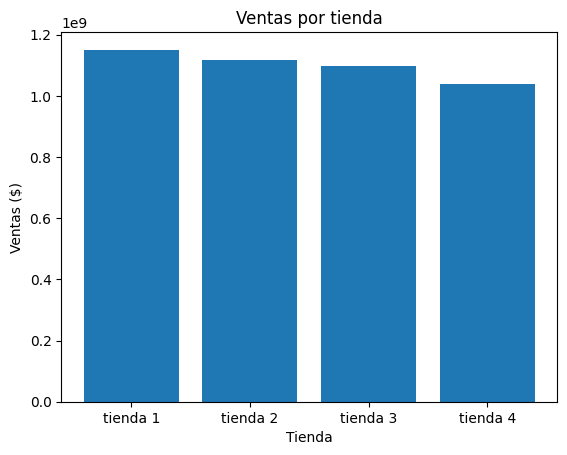

In [398]:
import matplotlib.pyplot as plt
# Extraer claves y valores
nombres = list(ventas_tiendas.keys())
valores = list(ventas_tiendas.values())

# Graficar
plt.bar(nombres, valores)
plt.title("Ventas por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ventas ($)")
plt.show()

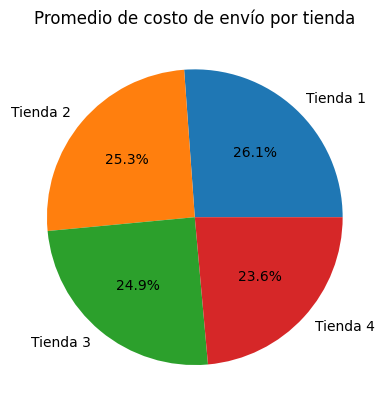

In [399]:
# Extraer claves y valores
nombret= list(lista_promedio_envio.keys())
valorest = list(lista_promedio_envio.values())

# Graficar pie
plt.pie(valorest, labels=nombret, autopct="%1.1f%%")
plt.title("Promedio de costo de envío por tienda")
plt.show()

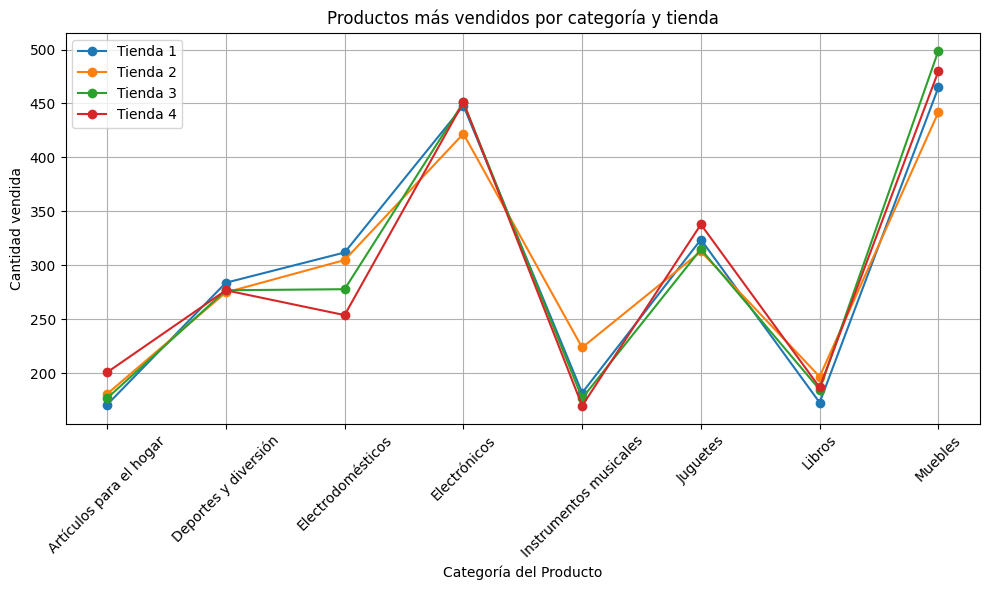

In [400]:
def gtraficos_lineales():
  categorias = set()
  for productos in dict_productos_conteo.values():
    categorias.update(productos.keys())
categorias = sorted(categorias)

# Crear la figura
plt.figure(figsize=(10, 6))

for tienda, productos in dict_productos_conteo.items():
    y = [productos.get(cat, 0) for cat in categorias]
    plt.plot(categorias, y, marker='o', label=tienda)

plt.title("Productos más vendidos por categoría y tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad vendida")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# REPORTE FINAL
El presente informe tiene como objetivo analizar el rendimiento de las cuatro tiendas de la empresa con base en datos históricos. El análisis se centró en variables clave como ingresos totales, categorías más y menos vendidas, calificaciones promedio de los clientes, productos más destacados y costos de envío. Con base en estos indicadores, se busca tomar una decisión estratégica sobre cuál de las tiendas debería ser vendida por el Sr. Juan.

A continuación se presentan los resultados obtenidos:

* **Menores ingresos totales:** La tienda 4 fue la que registró la facturación más baja entre todas, con un total de $1.038.375.700, lo cual indica un rendimiento comercial inferior respecto a las otras tiendas.
    > Observe la celda 398



*  **Menor diversidad en productos vendidos:** Aunque todas las tiendas tienen como producto más vendido la categoría "Muebles", la tienda 4 tiene el menor número de ventas en categorías menos populares, como Instrumentos musicales, lo que refleja una menor variedad y atractivo en su inventario.
* **Calificación promedio aceptable, pero no destacada:** Su calificación promedio es de 4.0, lo cual es buena, pero inferior a la tienda 3 (4.05) y tienda 2 (4.04), que reflejan una mayor satisfacción del cliente.
    > Observe la grafica en la celda 400



* **Costo de envío más bajo:** Aunque este es un punto positivo (promedio de $23.459,46), no compensa el bajo volumen de ventas y la calificación promedio más baja comparada con otras tiendas.
    > Observe la grafica en la celda 399


Después de comparar los datos de desempeño de las cuatro tiendas, se concluye que la tienda número 4 es la menos rentable y estratégica. Por lo tanto, se recomienda al Sr. Juan que venda esta tienda y pueda invertir las ganancias de estas en su nuevo emprendimiento.








